<a href="https://colab.research.google.com/github/shreyansh273/Fantasy-Premire-League/blob/main/FPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [27]:
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [28]:
main_df = elements_df[['web_name','first_name','team','element_type','now_cost','selected_by_percent','transfers_in','transfers_out','form','event_points','total_points','bonus','points_per_game','value_season','minutes','goals_scored','assists','ict_index','clean_sheets','saves']]
main_df.head()

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves
0,Özil,Mesut,1,3,68,0.6,3400,52847,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
1,Sokratis,Sokratis,1,2,48,0.1,10250,18820,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
2,David Luiz,David,1,2,54,0.7,39041,88393,0.3,0,9,0,1.1,1.7,479,0,0,16.5,0,0
3,Aubameyang,Pierre-Emerick,1,3,114,7.3,493856,3136850,2.0,0,47,4,3.6,4.1,1166,3,1,76.0,3,0
4,Cédric,Cédric,1,2,46,0.2,3848,34416,0.1,0,1,0,1.0,0.2,5,0,0,0.0,0,0


In [29]:
element_types_df = element_types_df[['id','singular_name']]
element_types_df.columns = ['element_type','Position']

In [30]:
main_df = pd.merge(left=main_df,right=element_types_df,left_on='element_type', right_on='element_type', how='left')
main_df.head()

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,Position
0,Özil,Mesut,1,3,68,0.6,3400,52847,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Midfielder
1,Sokratis,Sokratis,1,2,48,0.1,10250,18820,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Defender
2,David Luiz,David,1,2,54,0.7,39041,88393,0.3,0,9,0,1.1,1.7,479,0,0,16.5,0,0,Defender
3,Aubameyang,Pierre-Emerick,1,3,114,7.3,493856,3136850,2.0,0,47,4,3.6,4.1,1166,3,1,76.0,3,0,Midfielder
4,Cédric,Cédric,1,2,46,0.2,3848,34416,0.1,0,1,0,1.0,0.2,5,0,0,0.0,0,0,Defender


In [31]:
main_df = pd.merge(left=main_df,right=teams_df[['id','name','strength_overall_away','strength_overall_home']],left_on='team', right_on='id', how='left')
main_df = main_df.drop(["id", "team"],axis=1)
main_df = main_df.rename(columns = {'name': 'team'})
main_df.head()

,web_name,first_name,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,Position,team,strength_overall_away,strength_overall_home
0,Özil,Mesut,3,68,0.6,3400,52847,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Midfielder,Arsenal,1210,1190
1,Sokratis,Sokratis,2,48,0.1,10250,18820,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Defender,Arsenal,1210,1190
2,David Luiz,David,2,54,0.7,39041,88393,0.3,0,9,0,1.1,1.7,479,0,0,16.5,0,0,Defender,Arsenal,1210,1190
3,Aubameyang,Pierre-Emerick,3,114,7.3,493856,3136850,2.0,0,47,4,3.6,4.1,1166,3,1,76.0,3,0,Midfielder,Arsenal,1210,1190
4,Cédric,Cédric,2,46,0.2,3848,34416,0.1,0,1,0,1.0,0.2,5,0,0,0.0,0,0,Defender,Arsenal,1210,1190


In [35]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web_name               614 non-null    object
 1   first_name             614 non-null    object
 2   element_type           614 non-null    int64 
 3   now_cost               614 non-null    int64 
 4   selected_by_percent    614 non-null    object
 5   transfers_in           614 non-null    int64 
 6   transfers_out          614 non-null    int64 
 7   form                   614 non-null    object
 8   event_points           614 non-null    int64 
 9   total_points           614 non-null    int64 
 10  bonus                  614 non-null    int64 
 11  points_per_game        614 non-null    object
 12  value_season           614 non-null    object
 13  minutes                614 non-null    int64 
 14  goals_scored           614 non-null    int64 
 15  assists                

In [36]:
main_df.points_per_game = main_df.points_per_game.astype(np.float)
main_df.value_season = main_df.value_season.astype(np.float)
main_df.ict_index = main_df.ict_index.astype(np.float)
main_df.selected_by_percent = main_df.selected_by_percent.astype(np.float)
main_df.form = main_df.form.astype(np.float)

In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web_name               614 non-null    object 
 1   first_name             614 non-null    object 
 2   element_type           614 non-null    int64  
 3   now_cost               614 non-null    int64  
 4   selected_by_percent    614 non-null    float64
 5   transfers_in           614 non-null    int64  
 6   transfers_out          614 non-null    int64  
 7   form                   614 non-null    float64
 8   event_points           614 non-null    int64  
 9   total_points           614 non-null    int64  
 10  bonus                  614 non-null    int64  
 11  points_per_game        614 non-null    float64
 12  value_season           614 non-null    float64
 13  minutes                614 non-null    int64  
 14  goals_scored           614 non-null    int64  
 15  assist

In [47]:
team_games = main_df.loc[main_df['total_points']!=0]
team_games['played'] = team_games['total_points']/team_games['points_per_game']
team_games = pd.DataFrame(team_games.groupby('team')['played'].max()).reset_index()
team_games.played = team_games.played.astype(np.int)
team_games.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,team,played
0,Arsenal,15
1,Aston Villa,13
2,Brighton,15
3,Burnley,14
4,Chelsea,15


In [49]:
main_df = pd.merge(main_df, team_games, on="team", how="left")

In [50]:
main_df.head()

,web_name,first_name,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,Position,team,strength_overall_away,strength_overall_home,played
0,Özil,Mesut,3,68,0.6,3400,52847,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Midfielder,Arsenal,1210,1190,15
1,Sokratis,Sokratis,2,48,0.1,10250,18820,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Defender,Arsenal,1210,1190,15
2,David Luiz,David,2,54,0.7,39041,88393,0.3,0,9,0,1.1,1.7,479,0,0,16.5,0,0,Defender,Arsenal,1210,1190,15
3,Aubameyang,Pierre-Emerick,3,114,7.3,493856,3136850,2.0,0,47,4,3.6,4.1,1166,3,1,76.0,3,0,Midfielder,Arsenal,1210,1190,15
4,Cédric,Cédric,2,46,0.2,3848,34416,0.1,0,1,0,1.0,0.2,5,0,0,0.0,0,0,Defender,Arsenal,1210,1190,15


In [53]:
main_df['total_contribution']= main_df['goals_scored'] + main_df['assists']
main_df = main_df.loc[main_df.minutes > 0]
main_df.head(3)

,web_name,first_name,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,Position,team,strength_overall_away,strength_overall_home,played,total_contribution
2,David Luiz,David,2,54,0.7,39041,88393,0.3,0,9,0,1.1,1.7,479,0,0,16.5,0,0,Defender,Arsenal,1210,1190,15,0
3,Aubameyang,Pierre-Emerick,3,114,7.3,493856,3136850,2.0,0,47,4,3.6,4.1,1166,3,1,76.0,3,0,Midfielder,Arsenal,1210,1190,15,4
4,Cédric,Cédric,2,46,0.2,3848,34416,0.1,0,1,0,1.0,0.2,5,0,0,0.0,0,0,Defender,Arsenal,1210,1190,15,0


In [58]:
main_df.groupby('Position').aggregate({'value_season':np.mean, 'points_per_game':np.mean, 'total_points':np.sum, 'minutes':np.mean})

,value_season,points_per_game,total_points,minutes
Position,,,,
Defender,4.601754,2.523977,3897,636.304094
Forward,4.570492,2.793443,1887,549.540984
Goalkeeper,7.358621,3.275862,1075,912.413793
Midfielder,4.575916,2.608901,5228,633.643979


In [64]:
team_stats = main_df.groupby('team').aggregate({'value_season':np.mean, 'points_per_game':np.mean, 'total_points':np.sum, 'played': np.mean}).\
                  sort_values(by='value_season', ascending=False)
team_stats.head()

,value_season,points_per_game,total_points,played
team,,,,
Aston Villa,7.015789,4.042105,722,13
Southampton,6.655000,3.000000,715,15
Leeds,6.390000,2.660000,647,15
West Ham,5.928571,2.709524,652,15
Wolves,5.238095,2.566667,587,15


In [67]:
team_stats['value_per_game'] = team_stats['value_season']/team_stats['played']
team_stats['points_per_game'] = team_stats['total_points']/team_stats['played']
team_stats = team_stats.sort_values("value_per_game", ascending=False)
team_stats.head()

,value_season,points_per_game,total_points,played,value_per_game
team,,,,,
Aston Villa,7.015789,55.538462,722,13,0.539676
Southampton,6.655000,47.666667,715,15,0.443667
Leeds,6.390000,43.133333,647,15,0.426000
West Ham,5.928571,43.466667,652,15,0.395238
Wolves,5.238095,39.133333,587,15,0.349206


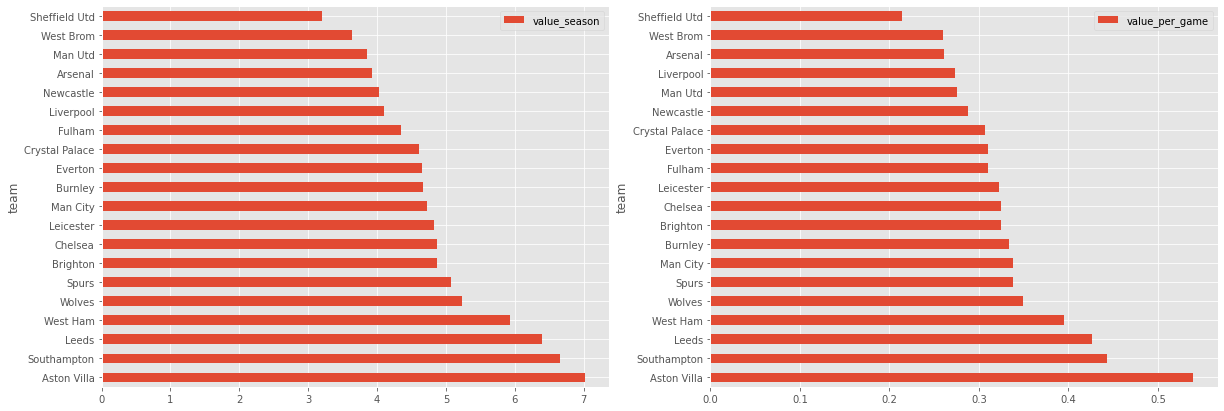

In [74]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
team_stats.sort_values("value_season", ascending=False).plot(y="value_season", kind='barh', ax=axes[0])
team_stats.sort_values("value_per_game", ascending=False).plot(y="value_per_game", kind='barh', ax=axes[1])

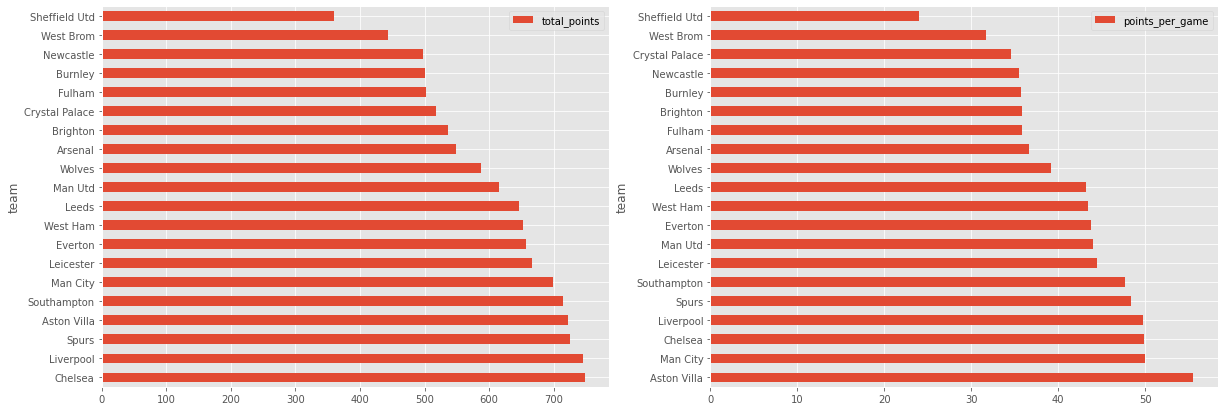

In [75]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
team_stats.sort_values("total_points", ascending=False).plot(y="total_points", kind='barh', ax=axes[0])
team_stats.sort_values("points_per_game", ascending=False).plot(y="points_per_game", kind='barh', ax=axes[1])

In [81]:
gk_df = main_df.loc[main_df.Position == 'Goalkeeper']
gk_df = gk_df[['web_name','team','selected_by_percent','now_cost','clean_sheets','saves','bonus','total_points','value_season']]
def_df = main_df.loc[main_df.Position == 'Defender']
def_df = def_df[['web_name','team','selected_by_percent','now_cost','clean_sheets','assists','goals_scored','total_contribution','ict_index','bonus','total_points','value_season']]
mid_df = main_df.loc[main_df.Position == 'Midfielder']
mid_df = mid_df[['web_name','team','selected_by_percent','now_cost','assists','goals_scored','total_contribution','ict_index','form','bonus','total_points','value_season']]
fwd_df = main_df.loc[main_df.Position == 'Forward']
fwd_df = fwd_df[['web_name','team','selected_by_percent','now_cost','assists','goals_scored','total_contribution','ict_index','form','minutes','bonus','total_points','value_season']]

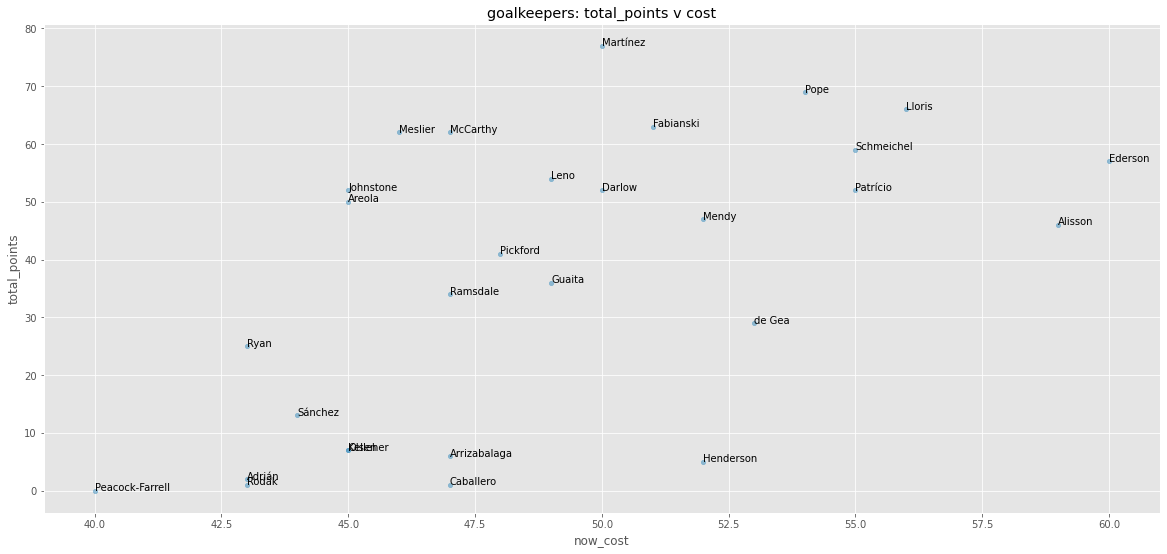

In [82]:
ax = gk_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

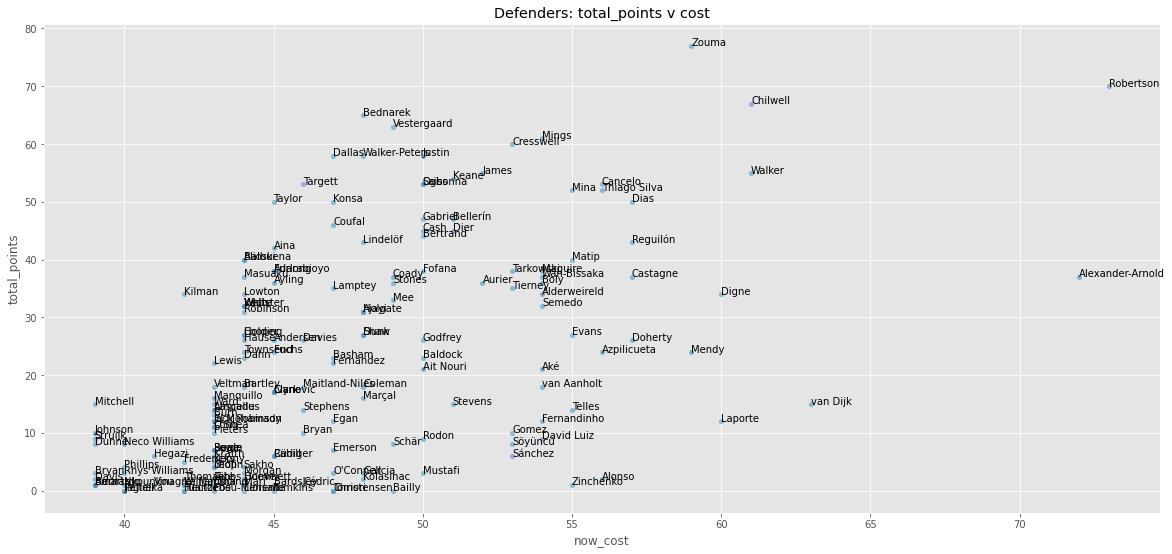

In [83]:
ax = def_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Defenders: total_points v cost")
for i, txt in enumerate(def_df.web_name):
    ax.annotate(txt, (def_df.now_cost.iat[i],def_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

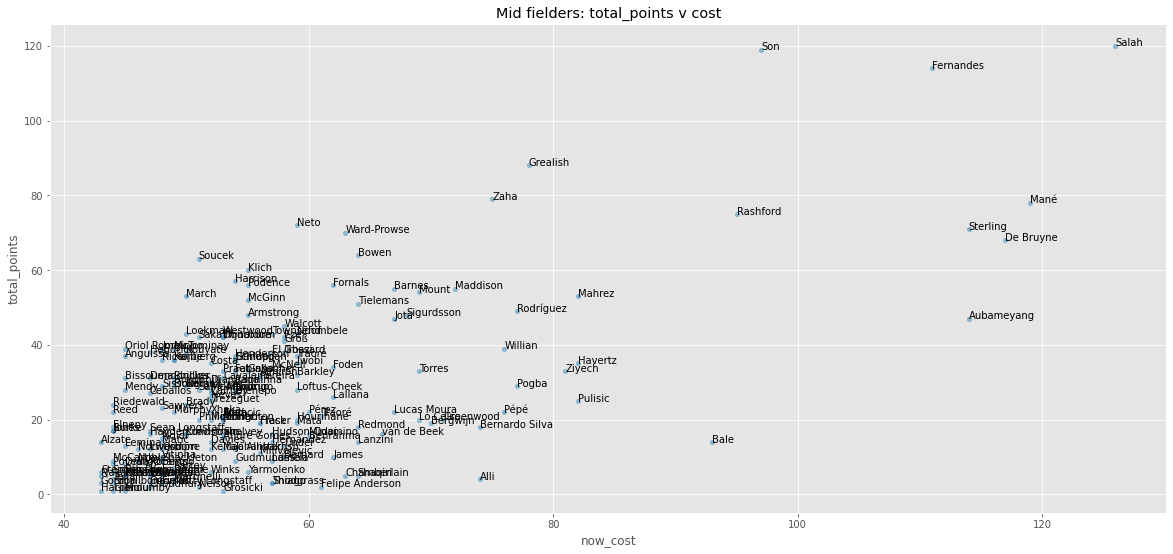

In [85]:
ax = mid_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Mid fielders: total_points v cost")
for i, txt in enumerate(mid_df.web_name):
    ax.annotate(txt, (mid_df.now_cost.iat[i],mid_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

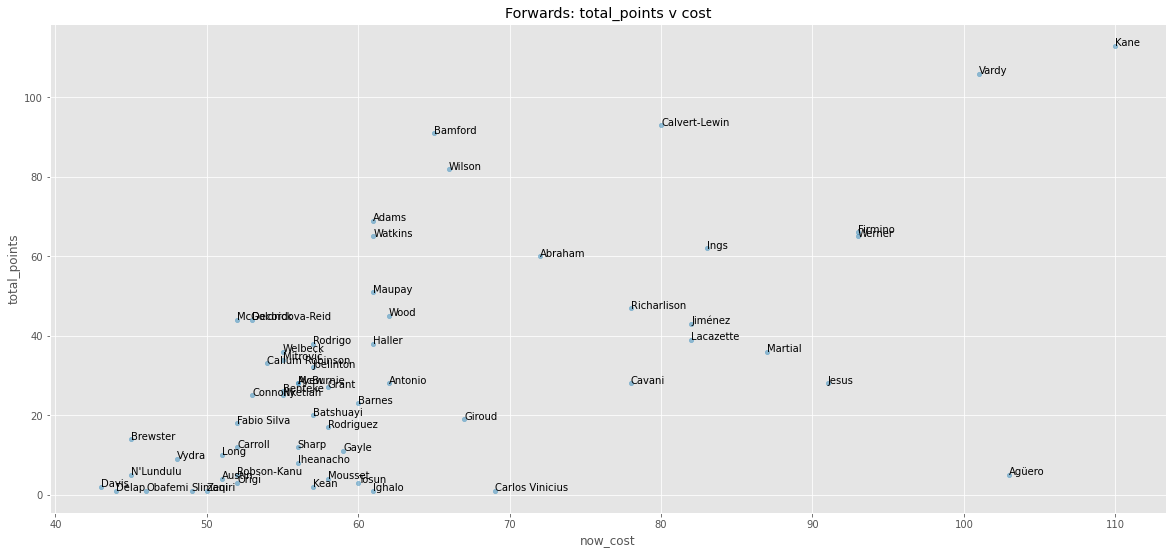

In [86]:
ax = fwd_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Forwards: total_points v cost")
for i, txt in enumerate(fwd_df.web_name):
    ax.annotate(txt, (fwd_df.now_cost.iat[i],fwd_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()